# LOAD AND TRANSFORM THE DATA

In [1]:
# Install libraries
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install ppscore
!pip install pandas
!pip install numpy

# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
import pandas as pd
import numpy as np
import warnings
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from datetime import datetime
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Load data
data = pd.read_csv('https://raw.githubusercontent.com/wiflore/ifood-data-business-analyst-test-latam/main/ml_project1_data.csv')

# Transform types
data['Education'] = data['Education'].astype("category")
data['Marital_Status'] = data['Marital_Status'].astype("category")
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['AcceptedCmp1'] = data['AcceptedCmp1'].astype("category")
data['AcceptedCmp2'] = data['AcceptedCmp2'].astype("category")
data['AcceptedCmp3'] = data['AcceptedCmp3'].astype("category")
data['AcceptedCmp4'] = data['AcceptedCmp4'].astype("category")
data['AcceptedCmp5'] = data['AcceptedCmp5'].astype("category")
data['Complain'] = data['Complain'].astype("category")
data['Response'] = data['Response'].astype("category")

# Delete irrelevant variables
data = data.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])

# Types and data
category_columns = list(data.select_dtypes(include=['category']).columns)
int_columns = list(data.select_dtypes(include=['int64', 'float64']).columns)
print('\n', '*'*190)
print('* category_columns:', category_columns)
print('* int_columns:', int_columns)
print('*'*190)

data


 **********************************************************************************************************************************************************************************************
* category_columns: ['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
* int_columns: ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
**********************************************************************************************************************************************************************************************


Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0     2012-09-04       58       635         88              546   
1     2014-03-08       38        11          1                6   
2     2013-08-21       26       426         49              127   
3     2014-02-10       26        11          4               20   
4     2014-01-19       94       173         43              118   
...          ...      ...       ...        ...              ...   
2235  2013-06-13       46       709         43              182   
2236  2014-06-10       56       406          0               30   
2237  2014-01-25       91       908         48              217   
2238  2014-01-24        8       428         30              214   
2239  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0                 172                88            88                  3   
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
...               ...               ...           ...                ...   
2235               42               118           247                  2   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                   8                   10                  4   
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
...               ...                  ...                ...   
2235                9                    3                  4   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth AcceptedCmp3 AcceptedCmp4 AcceptedCmp5 AcceptedCmp1  \
0                     7            0            0            0            0   
1                     5            0            0            0            0   
2                     4            0            0            0            0   
3                     6            0            0            0            0   
4                     5            0            0            0            0   
...                 ...          ...          ...          ...          ...   
2235                  5            0            0    

# EXPLORATORY ANALYSIS

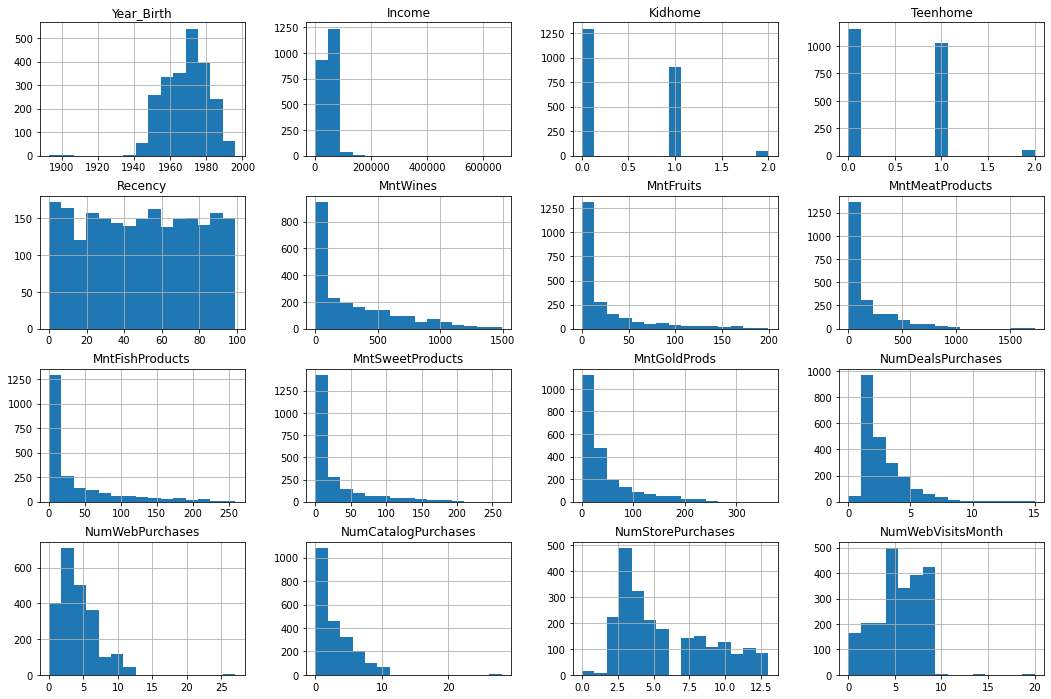

In [2]:
# Continuous variables distributions
data[int_columns].hist(bins=15, figsize=(18, 12), layout=(4, 4));

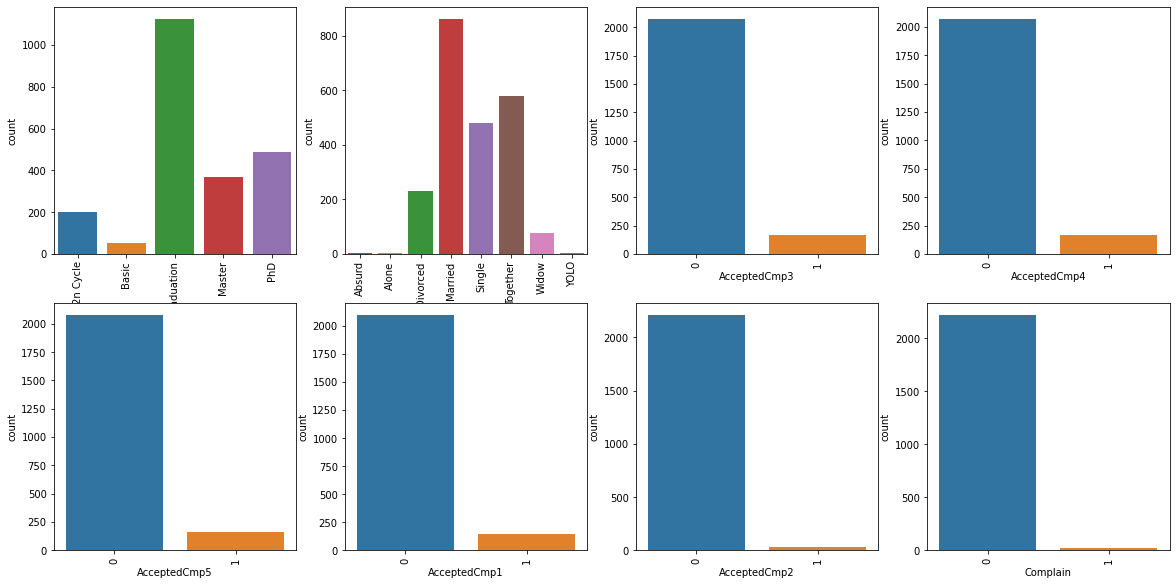

In [3]:
# Categorical variables distributions
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(category_columns, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

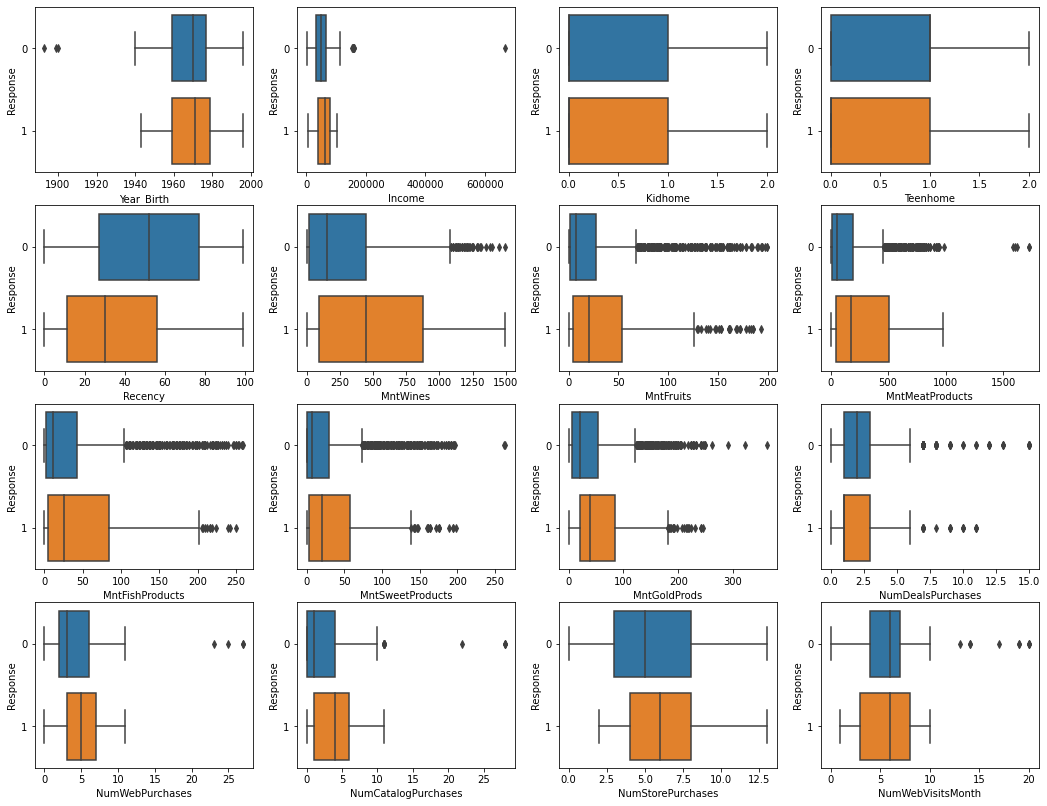

In [4]:
# Relation between continuous variables and response
fig, ax = plt.subplots(4, 4, figsize=(18, 14))
for var, subplot in zip(int_columns, ax.flatten()):
    sns.boxplot(x=var, y='Response', data=data, ax=subplot)

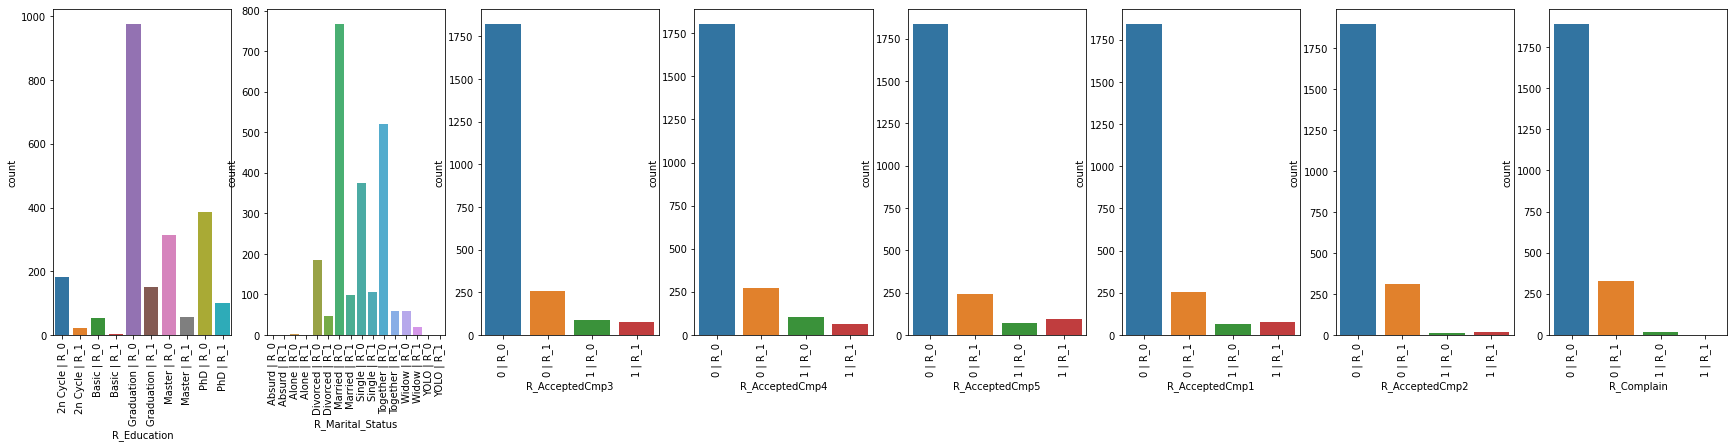

In [5]:
# Relation between categorical variables and response
data_category = data[category_columns].copy()
for column in data_category.columns:
    data_category[f'R_{column}'] = (data_category[column].astype(str)+' | R_'+data_category['Response'].astype(str)).astype('category')
    data_category = data_category.drop(columns=[column])

ig, ax = plt.subplots(1, 8, figsize=(30, 6))
for variable, subplot in zip(list(data_category.columns), ax.flatten()):
    sns.countplot(data_category[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# TREATMENT OF FOUND PROBLEMS

In [6]:
# Remove atipical observations
for column in int_columns:
    len_before = len(data)
    data['atipic'] = np.where(data[column]>np.mean(data[column])+3*np.std(data[column]), 1, 0)
    data = data[data['atipic']==0].drop(columns=['atipic'])
    len_after = len(data)
    print(f"{len_before-len_after} observations were eliminated for column {column}")

# Remove 22 observations with NA values
len_before = len(data)
data = data.dropna()
len_after = len(data)
print(f"{len_before-len_after} observations were eliminated for NA values")

data

0 observations were eliminated for column Year_Birth
8 observations were eliminated for column Income
0 observations were eliminated for column Kidhome
0 observations were eliminated for column Teenhome
0 observations were eliminated for column Recency
15 observations were eliminated for column MntWines
64 observations were eliminated for column MntFruits
49 observations were eliminated for column MntMeatProducts
51 observations were eliminated for column MntFishProducts
60 observations were eliminated for column MntSweetProducts
49 observations were eliminated for column MntGoldProds
28 observations were eliminated for column NumDealsPurchases
0 observations were eliminated for column NumWebPurchases
43 observations were eliminated for column NumCatalogPurchases
0 observations were eliminated for column NumStorePurchases
5 observations were eliminated for column NumWebVisitsMonth
20 observations were eliminated for NA values


Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
5           1967      Master       Together  62513.0        0         1   
...          ...         ...            ...      ...      ...       ...   
2234        1974  Graduation        Married  34421.0        1         0   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
1     2014-03-08       38        11          1                6   
2     2013-08-21       26       426         49              127   
3     2014-02-10       26        11          4               20   
4     2014-01-19       94       173         43              118   
5     2013-09-09       16       520         42               98   
...          ...      ...       ...        ...              ...   
2234  2013-07-01       81         3          3                7   
2236  2014-06-10       56       406          0               30   
2237  2014-01-25       91       908         48              217   
2238  2014-01-24        8       428         30              214   
2239  2012-10-15       40        84          3               61   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
1                   2                 1             6                  2   
2                 111                21            42                  1   
3                  10                 3             5                  2   
4                  46                27            15                  5   
5                   0                42            14                  2   
...               ...               ...           ...                ...   
2234                6                 2             9                  1   
2236                0                 0             8                  7   
2237               32                12            24                  1   
2238               80                30            61                  2   
2239                2                 1            21                  3   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1                   1                    1                  2   
2                   8                    2                 10   
3                   2                    0                  4   
4                   5                    3                  6   
5                   6                    4                 10   
...               ...                  ...                ...   
2234                1                    0                  2   
2236                8                    2                  5   
2237                2                    3                 13   
2238                6                    5                 10   
2239                3                    1                  4   

      NumWebVisitsMonth AcceptedCmp3 AcceptedCmp4 AcceptedCmp5 AcceptedCmp1  \
1                     5            0            0            0            0   
2                     4            0            0            0            0   
3                     6            0            0            0            0   
4                     5            0            0            0            0   
5                     6            0            0            0            0   
...                 ...          ...          ...          ...          ...   
2234                  7            0            0    

# CLASSIFICATION MODEL

In [7]:
# Weights PPS baseline model
matrix_corr = pps.matrix(data.drop(columns=['Dt_Customer']))
matrix_corr = matrix_corr[(matrix_corr['x']!=matrix_corr['y']) & (matrix_corr['y']=='Response') & (matrix_corr['x']!='Response')].sort_values('ppscore', ascending=False)
matrix_corr['ppscore'] = matrix_corr['ppscore'].apply(lambda x : round(x, 3))
matrix_corr.head(30)

x         y  ppscore            case  is_valid_score  \
524         AcceptedCmp5  Response    0.138  classification            True   
549         AcceptedCmp1  Response    0.090  classification            True   
349    NumDealsPurchases  Response    0.049  classification            True   
199             MntWines  Response    0.030  classification            True   
224            MntFruits  Response    0.015  classification            True   
249      MntMeatProducts  Response    0.012  classification            True   
574         AcceptedCmp2  Response    0.007  classification            True   
49             Education  Response    0.000  classification            True   
424    NumStorePurchases  Response    0.000  classification            True   
399  NumCatalogPurchases  Response    0.000  classification            True   
374      NumWebPurchases  Response    0.000  classification            True   
599             Complain  Response    0.000  classification            True   
499         AcceptedCmp4  Response    0.000  classification            True   
474         AcceptedCmp3  Response    0.000  classification            True   
174              Recency  Response    0.000  classification            True   
149             Teenhome  Response    0.000  classification            True   
124              Kidhome  Response    0.000  classification            True   
449    NumWebVisitsMonth  Response    0.000  classification            True   
24            Year_Birth  Response    0.000  classification            True   
299     MntSweetProducts  Response    0.000  classification            True   
274      MntFishProducts  Response    0.000  classification            True   
99                Income  Response    0.000  classification            True   
74        Marital_Status  Response    0.000  classification            True   
324         MntGoldProds  Response    0.000  classification            True   

          metric  baseline_score  model_score                     model  
524  weighted F1        0.827526     0.851388  DecisionTreeClassifier()  
549  weighted F1        0.827526     0.842987  DecisionTreeClassifier()  
349  weighted F1        0.827526     0.835931  DecisionTreeClassifier()  
199  weighted F1        0.827526     0.832616  DecisionTreeClassifier()  
224  weighted F1        0.827526     0.830078  DecisionTreeClassifier()  
249  weighted F1        0.827526     0.829663  DecisionTreeClassifier()  
574  weighted F1        0.827526     0.828742  DecisionTreeClassifier()  
49   weighted F1        0.827526     0.827526  DecisionTreeClassifier()  
424  weighted F1        0.827526     0.827526  DecisionTreeClassifier()  
399  weighted F1        0.827526     0.827526  DecisionTreeClassifier()  
374  weighted F1        0.827526     0.827526  DecisionTreeClassifier()  
599  weighted F1        0.827526     0.827526  DecisionTreeClassifier()  
499  weighted F1        0.827526     0.827526  DecisionTreeClassifier()  
474  weighted F1        0.827526     0.827526  DecisionTreeClassifier()  
174  weighted F1        0.827526     0.827526  DecisionTreeClassifier()  
149  weighted F1        0.827526     0.827526  DecisionTreeClassifier()  
124  weighted F1        0.827526     0.827526  DecisionTreeClassifier()  
449  weighted F1        0.827526     0.827526  DecisionTreeClassifier()  
24   weighted F1        0.827526     0.826716  DecisionTreeClassifier()  
299  weighted F1        0.827526     0.825288  DecisionTreeClassifier()  
274  weighted F1        0.827526     0.821919  DecisionTreeClassifier()  
99   weighted F1        0.827526     0.826496  DecisionTreeClassifier()  
74   weighted F1        0.827526     0.827256  DecisionTreeClassifier()  
324  weighted F1        0.827526     0.824462  DecisionTreeClassifier()

In [8]:
# Features and objetive for baseline model
X = data.copy()
X = X.dropna().drop(columns=['Dt_Customer', 'Education', 'Marital_Status'])
y = X.pop("Response")

# Train and test baseline model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print(f'acc_cross_validation_rf: %{round(np.mean(cross_val_score(rf, X=X, y=y, cv=10))*100, 2)}')

# Feature importances and performance in baseline
features_importance = pd.DataFrame(X_train.columns, columns=['feature'])
features_importance['importance'] = rf.feature_importances_
features_importance.sort_values(by='importance', ascending=False)

acc_cross_validation_rf: %90.15


feature  importance
4               Recency    0.107447
5              MntWines    0.089508
1                Income    0.081443
7       MntMeatProducts    0.080684
10         MntGoldProds    0.071249
0            Year_Birth    0.062417
15    NumWebVisitsMonth    0.058873
6             MntFruits    0.052950
9      MntSweetProducts    0.052565
14    NumStorePurchases    0.050210
8       MntFishProducts    0.043930
16         AcceptedCmp3    0.039349
12      NumWebPurchases    0.035681
11    NumDealsPurchases    0.034215
13  NumCatalogPurchases    0.033729
18         AcceptedCmp5    0.030583
19         AcceptedCmp1    0.027234
3              Teenhome    0.012635
2               Kidhome    0.012226
17         AcceptedCmp4    0.012075
20         AcceptedCmp2    0.009444
21             Complain    0.001554

In [9]:
# Create new variables (after see what variables work)
X = data.copy()
X['DaysRegistered'] = datetime.utcnow() - X['Dt_Customer']
X['DaysRegistered'] = X['DaysRegistered'].apply(lambda x : x.days)
X['AcceptedCmpAll'] = X['AcceptedCmp1'].astype("int") + X['AcceptedCmp2'].astype("int") + X['AcceptedCmp3'].astype("int") + X['AcceptedCmp4'].astype("int") + X['AcceptedCmp5'].astype("int")
X['CustomerAge'] = 2021 - X['Year_Birth']
X['MntTotal'] = X['MntFishProducts'] + X['MntFruits'] + X['MntMeatProducts'] + X['MntSweetProducts'] + X['MntWines'] + X['MntGoldProds']

# Drop predictor variables highly correlated with each other
X = X.drop(columns=['Year_Birth', 'Dt_Customer']).drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Teenhome', 'Kidhome',
'MntFishProducts', 'MntFruits', 'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'MntGoldProds', 'Marital_Status', 'Education', 'Complain', 'NumCatalogPurchases',
'NumStorePurchases', 'NumWebVisitsMonth', 'NumWebPurchases', 'NumDealsPurchases', 'CustomerAge'])
X = X.dropna()
y = X.pop("Response")

X

Income  Recency  DaysRegistered  AcceptedCmpAll  MntTotal
1     46344.0       38            2719               0        27
2     71613.0       26            2918               0       776
3     26646.0       26            2745               0        53
4     58293.0       94            2767               0       422
5     62513.0       16            2899               0       716
...       ...      ...             ...             ...       ...
2234  34421.0       81            2969               0        30
2236  64014.0       56            2625               1       444
2237  56981.0       91            2761               1      1241
2238  69245.0        8            2762               0       843
2239  52869.0       40            3228               0       172

[1848 rows x 5 columns]

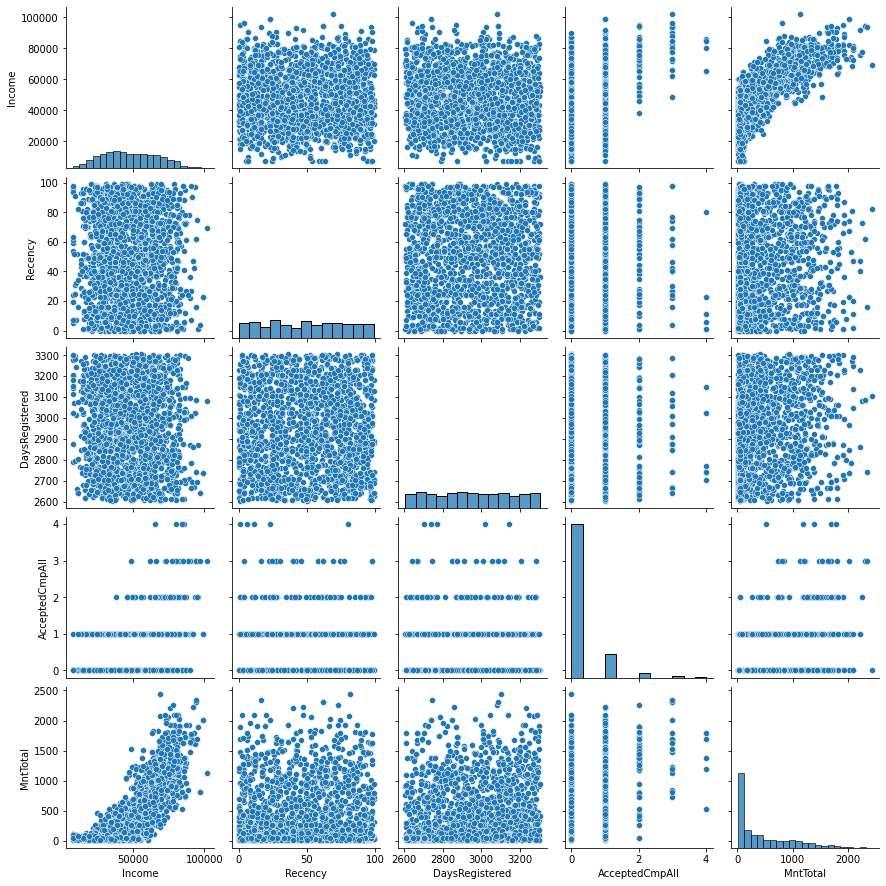

In [10]:
# Visual correlations
sns.pairplot(X)

<AxesSubplot:>

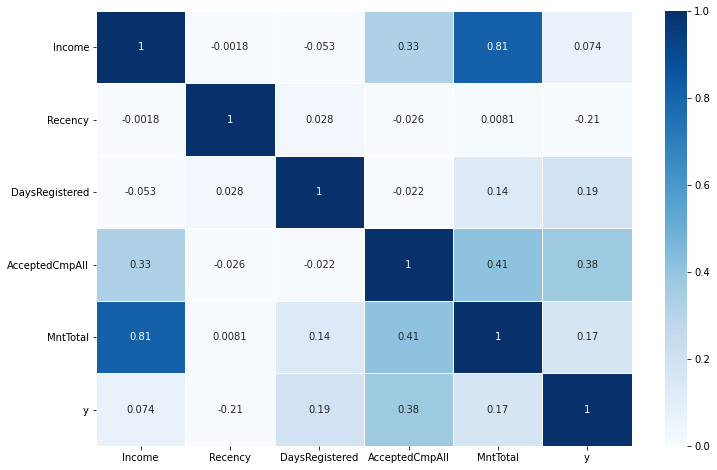

In [11]:
# Linear correlation
linear_corr = X.copy()
linear_corr['y'] = y.astype(int)
fig, ax = plt.subplots(figsize=(12,8))
linear_corr_matrix = linear_corr.corr()
sns.heatmap(linear_corr_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [12]:
# Weights PPS with new variables
data_corr = X.copy()
data_corr['Response'] = y
matrix_corr = pps.matrix(data_corr)
matrix_corr = matrix_corr[(matrix_corr['x']!=matrix_corr['y']) & (matrix_corr['y']=='Response') & (matrix_corr['x']!='Response')].sort_values('ppscore', ascending=False)
matrix_corr['ppscore'] = matrix_corr['ppscore'].apply(lambda x : round(x, 3))
matrix_corr

x         y  ppscore            case  is_valid_score  \
23  AcceptedCmpAll  Response    0.132  classification            True   
29        MntTotal  Response    0.030  classification            True   
17  DaysRegistered  Response    0.026  classification            True   
11         Recency  Response    0.000  classification            True   
5           Income  Response    0.000  classification            True   

         metric  baseline_score  model_score                     model  
23  weighted F1        0.827526     0.850371  DecisionTreeClassifier()  
29  weighted F1        0.827526     0.832727  DecisionTreeClassifier()  
17  weighted F1        0.827526     0.831984  DecisionTreeClassifier()  
11  weighted F1        0.827526     0.827526  DecisionTreeClassifier()  
5   weighted F1        0.827526     0.826496  DecisionTreeClassifier()

In [13]:
# Train and test with new variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##################################################################################################################################################
#################### THIS BLOCK IS FOR RANDOM OPTIMIZATION, IT IS COMMENTED TO AVOID LONG PROCESSING TIMES (ABOUT 30 MINUTES) ####################
##################################################################################################################################################

# ## RandomForest optimization with new variables
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']

# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)

# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]

# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]

# # Method of selecting samples for training each tree
# bootstrap = [True, False]

# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# # Random search of parameters, using 5 fold cross validation, search across 100 different combinations with new variables. 10*2*12*3*3*2 = 4320.
# rf = RandomForestClassifier()
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(X_train, y_train)
# rf_random.best_params_

# # Use optimized params with new variables
# random_forest = RandomForestClassifier(n_estimators=rf_random.best_params_['n_estimators'],
#                                        min_samples_split=rf_random.best_params_['min_samples_split'],
#                                        min_samples_leaf=rf_random.best_params_['min_samples_leaf'],
#                                        max_features=rf_random.best_params_['max_features'],
#                                        max_depth=rf_random.best_params_['max_depth'],
#                                        bootstrap=rf_random.best_params_['bootstrap'])

##################################################################################################################################################

# "Best_params_" was obtained in previous iterations
best_params_ = {'n_estimators': 600,
                'min_samples_split': 10,
                'min_samples_leaf': 1,
                'max_features': 'sqrt',
                'max_depth': 110,
                'bootstrap': True}

# Use optimized params with new variables
random_forest = RandomForestClassifier(n_estimators=best_params_['n_estimators'],
                                       min_samples_split=best_params_['min_samples_split'],
                                       min_samples_leaf=best_params_['min_samples_leaf'],
                                       max_features=best_params_['max_features'],
                                       max_depth=best_params_['max_depth'],
                                       bootstrap=best_params_['bootstrap'])

##################################################################################################################################################

random_forest.fit(X_train, y_train)
print(f'acc_cross_validation_rf: %{round(np.mean(cross_val_score(random_forest, X=X, y=y, cv=10))*100, 2)}')

# Feature importances and performance with new variables
features_importance = pd.DataFrame(X_train.columns, columns=['feature'])
features_importance['importance'] = random_forest.feature_importances_
features_importance.sort_values(by='importance', ascending=False)

acc_cross_validation_rf: %89.99


feature  importance
2  DaysRegistered    0.226349
1         Recency    0.205824
0          Income    0.191590
3  AcceptedCmpAll    0.189147
4        MntTotal    0.187090

# CLUSTERING

In [14]:
# Standardization
data_cluster = X.copy()
data_cluster['Response'] = y
data_cluster['Income_standar'] = StandardScaler().fit_transform(data_cluster[['Income']])
data_cluster['Recency_standar'] = StandardScaler().fit_transform(data_cluster[['Recency']])
data_cluster['DaysRegistered_standar'] = StandardScaler().fit_transform(data_cluster[['DaysRegistered']])
data_cluster['AcceptedCmpAll_standar'] = StandardScaler().fit_transform(data_cluster[['AcceptedCmpAll']])
data_cluster['MntTotal_standar'] = StandardScaler().fit_transform(data_cluster[['MntTotal']])

# Dimensionality reduction
pca = PCA(n_components=2)
transform_pca = pca.fit_transform(data_cluster[['Income_standar', 'Recency_standar', 'DaysRegistered_standar','AcceptedCmpAll_standar', 'MntTotal_standar']])
data_cluster['principal_feature1'] = transform_pca[:,0]
data_cluster['principal_feature2'] = transform_pca[:,1]
data_cluster

Income  Recency  DaysRegistered  AcceptedCmpAll  MntTotal Response  \
1     46344.0       38            2719               0        27        0   
2     71613.0       26            2918               0       776        0   
3     26646.0       26            2745               0        53        0   
4     58293.0       94            2767               0       422        0   
5     62513.0       16            2899               0       716        0   
...       ...      ...             ...             ...       ...      ...   
2234  34421.0       81            2969               0        30        0   
2236  64014.0       56            2625               1       444        0   
2237  56981.0       91            2761               1      1241        0   
2238  69245.0        8            2762               0       843        0   
2239  52869.0       40            3228               0       172        1   

      Income_standar  Recency_standar  DaysRegistered_standar  \
1          -0.073547        -0.379803               -1.165292   
2           1.263106        -0.795812               -0.170442   
3          -1.115512        -0.795812               -1.035312   
4           0.558519         1.561572               -0.925328   
5           0.781744        -1.142486               -0.265428   
...              ...              ...                     ...   
2234       -0.704238         1.110895                0.084519   
2236        0.861142         0.244210               -1.635221   
2237        0.489118         1.457569               -0.955324   
2238        1.137846        -1.419825               -0.950324   
2239        0.271605        -0.310468                1.379323   

      AcceptedCmpAll_standar  MntTotal_standar  principal_feature1  \
1                  -0.395938         -0.860124           -0.825523   
2                  -0.395938          0.621994            1.011468   
3                  -0.395938         -0.808675           -1.432576   
4                  -0.395938         -0.078500            0.072986   
5                  -0.395938          0.503266            0.632840   
...                      ...               ...                 ...   
2234               -0.395938         -0.854187           -1.166869   
2236                1.350346         -0.034966            1.031488   
2237                1.350346          1.542133            1.843214   
2238               -0.395938          0.754573            0.987974   
2239               -0.395938         -0.573198           -0.312035   

      principal_feature2  
1               1.177034  
2               0.541910  
3               1.241774  
4              -0.171602  
5               0.799358  
...                  ...  
2234           -0.711112  
2236            1.420030  
2237           -0.011597  
2238            1.498144  
2239           -0.900677  

[1848 rows x 13 columns]

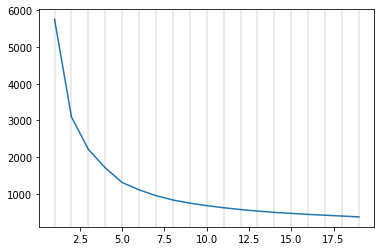

In [15]:
# Elbow method to determine the number of nodes
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i, max_iter=10000).fit(data_cluster[['principal_feature1', 'principal_feature2']]) for i in n_cluster]
scores = [kmeans[i].inertia_ for i in range(len(kmeans))]
fig, ax = plt.subplots()
ax.plot(n_cluster, scores)
for line in n_cluster:
    plt.axvline(line, alpha=0.1, c='black')
plt.show()

In [16]:
# Number of observations for each cluster
data_cluster['cluster'] = kmeans[4].predict(data_cluster[['principal_feature1', 'principal_feature2']])
data_cluster['cluster'].value_counts()

2    577
1    533
0    322
3    296
4    120
Name: cluster, dtype: int64

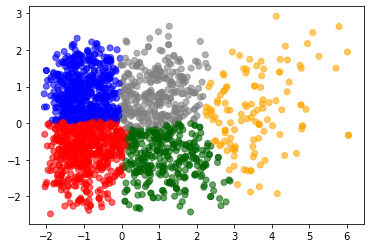

In [17]:
# Clusters graph
ig, ax = plt.subplots()
colors = {0:'darkgreen', 1:'blue', 2:'red', 3:'grey', 4:'orange', 5:'pink', 6:'lime', 7:'sandybrown', 8:'brown', 9:'purple', 10:'white', 11: 'royalblue', 12:'thistle', 13:'lightgreen', 14: 'black'}
ax.scatter(data_cluster['principal_feature1'], data_cluster['principal_feature2'], c=data_cluster["cluster"].apply(lambda x: colors[x]), alpha=0.6)
plt.show()

In [18]:
# Explore the clusters
df = data_cluster[['Income', 'Recency', 'DaysRegistered', 'AcceptedCmpAll', 'MntTotal', 'Response', 'cluster']]
df['Response'] = df['Response'].astype(int)
for cluster, value in sorted(dict(df['cluster'].value_counts()).items()):
    print(f'************** CLUSTER {cluster} (color {colors[cluster]}) with {len(df[df["cluster"]==cluster])} observations *************\n')
    print(df[df['cluster']==cluster].drop(columns=['cluster']).describe().loc[['mean']], '\n\n')

************** CLUSTER 0 (color darkgreen) with 322 observations *************

            Income    Recency  DaysRegistered  AcceptedCmpAll    MntTotal  \
mean  63215.468944  62.232919     3110.947205        0.214286  954.012422   

      Response  
mean  0.108696   


************** CLUSTER 1 (color blue) with 533 observations *************

            Income    Recency  DaysRegistered  AcceptedCmpAll    MntTotal  \
mean  36573.409006  36.958724     2795.688555        0.073171  100.739212   

      Response  
mean  0.084428   


************** CLUSTER 2 (color red) with 577 observations *************

            Income    Recency  DaysRegistered  AcceptedCmpAll    MntTotal  \
mean  34457.691508  59.941075     3080.824957        0.039861  154.941075   

      Response  
mean   0.10052   


************** CLUSTER 3 (color grey) with 296 observations *************

            Income    Recency  DaysRegistered  AcceptedCmpAll    MntTotal  \
mean  64184.695946  35.060811     2814.5439